## Analysis of a mass spring damper system

![](http://blogs.mathworks.com/images/loren/2013/MassSpringDamper.png)
<center>**Fig 1.** Schematic of spring mass system</center>
<br />
<br />

Consider a spring mass damper system of mass(m), spring constant(k) and damping factor(c) as shown in Fig 1.

From Newtons Law,
$$ \Sigma f = ma$$<br />

$$-kx-c\dfrac{dx}{dt} = m\dfrac{d^2x}{dt^2}$$

rearranging

$$m\dfrac{d^2x}{dt^2} + c\dfrac{dx}{dt} + kx = 0$$

dividing by m

$$\dfrac{d^2x}{dt^2} + \dfrac{c}{m}\dfrac{dx}{dt} + \dfrac{k}{m}x = 0$$ 

Let $\omega_o = \sqrt{\frac{k}{m}} $, be the natural frequency of the system and $\zeta = \frac{c}{2\sqrt{km}}$, be the damping ratio, we get

$$\dfrac{d^2x}{dt^2} + 2\omega_o \zeta \dfrac{dx}{dt} + \omega_o^2 x = 0$$ 


In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
sqrt = np.sqrt


#System constants
k = 10.0 #spring constant in kg/s^2
m = 10.0 #mass in kg
c = 1.0  #damping factor in kg/s 

#Time discretisation
t = np.arange(0.0, 100.1, 0.1)

def mass_spring_damper(state, t):
    """Computes and returns the velocity and acceleration of system
    based on values of system constants
    """
    #Stores position and velocity of the system at each timestep 
    x = state[0]
    velocity = state[1]
    #Constants
    omega = sqrt(k/m)  #natural frequency of system 
    zeta = c/(2.0*sqrt(k*m))  #damping ratio
    #Computes and stores acceleration of the system at each timestep 
    acceleration = -2*omega*zeta*velocity - (omega**2)*x
    return [velocity, acceleration]


def state_of_system():
    """Integrates the ode based on initial condition and returns the 
    the position and velocity of the system at each time step
    """
    #Initial conditions of position and velocity of the system
    state0 = [0.0, 1.0]
    state = odeint(mass_spring_damper, state0, t)
    return state


def plot_state():
    """Plots the variation of state variables(position and velocity)
    of system as a function of time
    """ 
    state = state_of_system() 
    fig = plt.figure(1)
    plt.plot(t, state[:,0], label='Position (m)')
    plt.plot(t, state[:,1], label='Velocity (m/s)')
    plt.xlabel('time (s)', fontsize=13)
    plt.ylabel('State', fontsize=13)
    plt.xticks(np.arange(0,110,10))
    plt.yticks(np.arange(-1.0,1.5,0.5))
    plt.title('Plot of position and velocity of mass-spring damper system versus time', y=1.04, fontsize=14)
    plt.legend()
    plt.grid()
    plt.show()



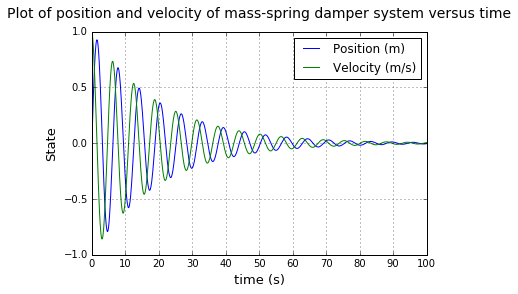

In [15]:
plot_state()